<a href="https://colab.research.google.com/github/jamesafranke/computing_bootcamp/blob/master/bootcamp_viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computing Bootcamp -- Week 2 -- Visualization
-- Jim Franke -- jfranke@uchicago.edu

## To install basemap
#### only run one time at the beginning of opening a notebook


In [0]:
!apt-get -qq install libgeos-dev
!pip install -qq https://github.com/matplotlib/basemap/archive/master.zip

In [0]:
# run this cell to mount to the drive
from google.colab import drive
drive.mount('/content/drive')

## Import required packages

In [0]:
# numpy, pandas and plotting
import numpy as np
import pandas as pd

import matplotlib.pylab as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import from_levels_and_colors, rgb2hex
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Toy Datasets
from sklearn import datasets

### Toy datasets

Scikit learn:
1. load_boston (regression).
2. load_iris (classification).
3. load_diabetes (regression).
4. load_digits (classification).
5. load_linnerud (multivariate regression).
6. load_wine (classification).
7. load_breast_cancer (classification).

Seaborn:
https://github.com/mwaskom/seaborn-data


In [0]:
data = datasets.load_iris()
df = pd.DataFrame(data.data, columns = data.feature_names)
df['target'] = data.target
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


## Making simple plots directly in pandas

https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

<Figure size 360x360 with 0 Axes>

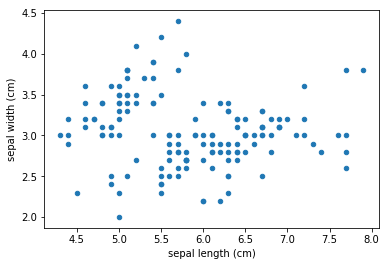

In [0]:
fig = plt.figure(figsize=(5,5))
df.plot.scatter(x = 'sepal length (cm)', 
                y = 'sepal width (cm)'
               )
plt.show()

<Figure size 360x360 with 0 Axes>

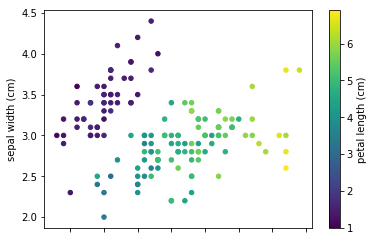

In [0]:
fig = plt.figure(figsize=(5,5))

df.plot.scatter(x = 'sepal length (cm)', 
                y = 'sepal width (cm)', 
                c = 'petal length (cm)', cmap= plt.cm.viridis
               )
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/colorbar.py:214: UserWarning: Use the colorbar set_ticks() method instead.
  warnings.warn("Use the colorbar set_ticks() method instead.")


<Figure size 504x360 with 0 Axes>

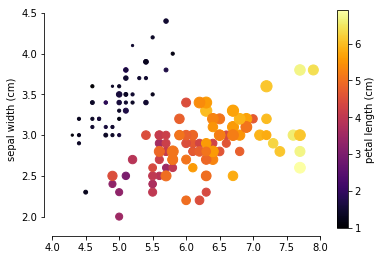

In [0]:
fig = plt.figure(figsize=(7,5))

df.plot.scatter(c = 'petal length (cm)', cmap= plt.cm.inferno, 
                s = (df['petal width (cm)']*50),
                x = 'sepal length (cm)', 
                y = 'sepal width (cm)' 
               )

plt.xlabel('sepal lenght (cm)')
plt.xlim(4,8)
sns.despine(offset=8, trim=True)
plt.savefig('test.png', dpi=300)
plt.show()

## Gridspec

In [0]:
fig = plt.figure(figsize=(10,5))
gs = gridspec.GridSpec(3, 3)
gs.update(wspace=0.05, hspace=0.15)

ax = plt.subplot(gs[0,0])

## Seaborn
https://seaborn.pydata.org/examples/index.html

## Continous examples

## Discrete examples

## Colormaps
https://matplotlib.org/users/colormaps.html

http://colorbrewer2.org/#type=diverging&scheme=Spectral&n=11

In [0]:
########### User segmented colormap ###########################
def segcolor(cmap, num_level, diverge = True, preview = False):
    # Discretizes one of python's built-in continious colormaps at any number of levels you choose
    # cmap: plt.cm.*name of colormap*  (CaSe SeNsiTiVe!!) 
    # num_level: int, number of segments you want in your colormap, if diverging... number on each side of midpoint
    colormap = []
    for i in range(cmap.N): colormap.append(rgb2hex(cmap(i)[:3]))                                        # will return rgba, we take only first 3 so we get rgb
    colormap = np.array(colormap).reshape((1, len(colormap))).flatten()

    if diverge == True:
        low  = colormap[np.round(np.linspace(0, 126, num_level+1)).astype(int)].tolist()
        high = colormap[np.round(np.linspace(127, len(colormap) - 1, num_level+1)).astype(int)].tolist()
        colorout = np.hstack([low[:-1],'white',high[1:]]).tolist()

    else: colorout = colormap[np.round(np.linspace(0, len(colormap) - 1, num_level)).astype(int)].tolist()

    if preview == True:
        fig = plt.figure(figsize=((len(colorout)-1)/2,0.5))
        for i in range(len(colorout)): 
            plt.scatter(i, 0, facecolor = colorout[i], edgecolor = 'black', s = 500, marker = 's')
        plt.yticks([])
        plt.xticks([])
        plt.xlim(-0.51, i+0.5)
        plt.show()
    else: pass
    return(colorout)

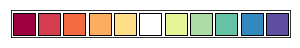

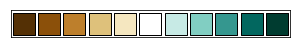

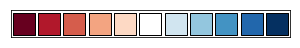

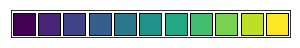

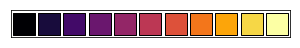

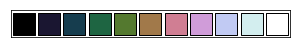

In [0]:
### **GOOD** Colormaps ###
### Diverging
x = segcolor(plt.cm.Spectral, 5, True, True)
x = segcolor(plt.cm.BrBG, 5, True, True)
x = segcolor(plt.cm.RdBu, 5, True, True)

### Sequential
x = segcolor(plt.cm.viridis, 11, False, True)
x = segcolor(plt.cm.inferno, 11, False, True)
x = segcolor(plt.cm.cubehelix, 11, False, True)

## Plotting on a map

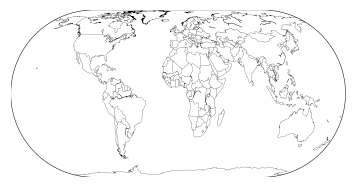

In [0]:
ll = -48; ul = 68; llo = -130; ulo = 165
var1 = np.zeros((360,720))

#m = Basemap(projection='cyl',llcrnrlat=ll,urcrnrlat=ul,llcrnrlon=llo,urcrnrlon=ulo,resolution='c')
m = Basemap(projection='eck4', lon_0 = 0 , resolution='c')
lat = np.linspace(90,-90, var1.shape[0])
lon = np.linspace(-180,180, var1.shape[1])
lon2d, lat2d = np.meshgrid(lon, lat)
x, y = m(lon2d, lat2d)
m.drawmapboundary(fill_color='white', color='black', linewidth=0.5)
m.drawcoastlines(linewidth=0.2, color='black')
m.drawcountries(linewidth=0.2, color='black')

## Animations

# SKLEARN PCA

In [0]:
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()